In [12]:
import pandas as pd
import numpy as np
import seaborn as sea
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import patsy

from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from scipy import stats

In [13]:
data = pd.read_csv("../Documents/Mmaster.csv.csv")


In [14]:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,671,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,female,15-24 years,14,289700,483,Albania1987,NaN,"2,156,624,900",796,Generation X
2,Albania,1988,male,15-24 years,17,319200,533,Albania1988,NaN,"2,126,000,000",769,Generation X
3,Albania,1988,female,15-24 years,8,295600,271,Albania1988,NaN,"2,126,000,000",769,Generation X
4,Albania,1989,male,15-24 years,12,323500,371,Albania1989,NaN,"2,335,124,988",833,Generation X


In [15]:
europe = ['Albania', 'Austria', 'Azerbaijan', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Montenegro', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russian Federation', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom']
asia = ['Armenia', 'Bahrain', 'Israel', 'Japan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Macau', 'Maldives', 'Mongolia', 'Oman', 'Philippines', 'Qatar', 'Republic of Korea', 'Singapore', 'Sri Lanka', 'Thailand', 'Turkey', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan']
northamerica = ['Antigua and Barbuda', 'Bahamas', 'Barbados', 'Belize', 'Canada', 'Costa Rica', 'Cuba', 'Dominica', 'El Salvador', 'Grenada', 'Guatemala', 'Jamaica', 'Mexico', 'Nicaragua', 'Panama', 'Puerto Rico', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and Grenadines', 'United States']
southamerica =  ['Argentina', 'Aruba', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Paraguay', 'Suriname', 'Trinidad and Tobago', 'Uruguay']
africa = ['Cabo Verde', 'Mauritius', 'Seychelles', 'South Africa'] 
australiaoceania = ['Australia', 'Fiji', 'Kiribati', 'New Zealand']
#move these to a dictionary of continents
continents = {country: 'Asia' for country in asia}
continents.update({country: 'Europe' for country in europe})
continents.update({country: 'Africa' for country in africa})
continents.update({country: 'North_America' for country in northamerica})
continents.update({country: 'South_America' for country in southamerica})
continents.update({country: 'Australia_Oceania' for country in australiaoceania})

In [16]:
data['Continent'] = data['country'].map(continents)

In [17]:
datatesting = data[['Continent','year','suicides_no']]
datatesting

,Continent,year,suicides_no
0,Europe,1987,21
1,Europe,1987,14
2,Europe,1988,17
3,Europe,1988,8
4,Europe,1989,12
...,...,...,...
27815,Asia,2012,4
27816,Asia,2013,13
27817,Asia,2013,8
27818,Asia,2014,17


In [7]:
data.shape

(27820, 13)

In [8]:
datacont = data.groupby(['Continent','country'],sort=True,as_index=False)['suicides_no','gdp_per_capita ($)'].sum()

C:\Users\asuss\AppData\Local\Temp/ipykernel_14584/18731544.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  datacont = data.groupby(['Continent','country'],sort=True,as_index=False)['suicides_no','gdp_per_capita ($)'].sum()


In [9]:
datacont['gdp_per_capita ($)'] = datacont['gdp_per_capita ($)'].div(2)
datacont.reset_index(level=0, inplace=True)

In [10]:
datacont

,index,Continent,country,suicides_no,gdp_per_capita ($)
0,0,Africa,Cabo Verde,42,24744.0
1,1,Africa,Mauritius,3894,1051772.0
2,2,Africa,Seychelles,98,1150818.0
3,3,Africa,South Africa,7321,670740.0
4,4,Asia,Armenia,1905,279214.0
...,...,...,...,...,...
96,96,South_America,Guyana,3426,251238.0
97,97,South_America,Paraguay,4783,383256.0
98,98,South_America,Suriname,2166,731130.0
99,99,South_America,Trinidad and Tobago,4039,1430304.0


<function matplotlib.pyplot.show(close=None, block=None)>

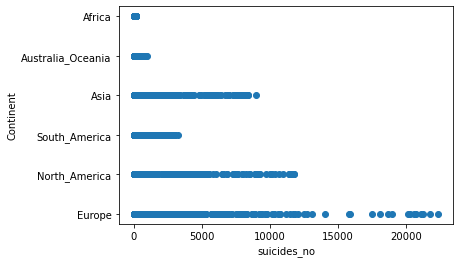

In [113]:
plt.scatter(data['suicides_no'],data['Continent'])
plt.xlabel('suicides_no')
plt.ylabel('Continent')
plt.show

#plot komutu ile verilen verinin dağılım grafiği

In [120]:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,Continent
0,Albania,1987,male,15-24 years,21,312900,671,Albania1987,NaN,"2,156,624,900",796,Generation X,Europe
1,Albania,1987,female,15-24 years,14,289700,483,Albania1987,NaN,"2,156,624,900",796,Generation X,Europe
2,Albania,1988,male,15-24 years,17,319200,533,Albania1988,NaN,"2,126,000,000",769,Generation X,Europe
3,Albania,1988,female,15-24 years,8,295600,271,Albania1988,NaN,"2,126,000,000",769,Generation X,Europe
4,Albania,1989,male,15-24 years,12,323500,371,Albania1989,NaN,"2,335,124,988",833,Generation X,Europe


In [126]:
selected_columns = ['suicides_no', 'suicide_100k',
       'current_gdp', 'gdp_capita', 'part_generation', 'Boomers',
       'G.I. Generation']



In [127]:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,Continent,occurence,part_generation
0,Albania,1987,male,15-24 years,21,312900,671,Albania1987,NaN,"2,156,624,900",796,Generation X,Europe,1,0
1,Albania,1987,female,15-24 years,14,289700,483,Albania1987,NaN,"2,156,624,900",796,Generation X,Europe,1,0
2,Albania,1988,male,15-24 years,17,319200,533,Albania1988,NaN,"2,126,000,000",769,Generation X,Europe,1,0
3,Albania,1988,female,15-24 years,8,295600,271,Albania1988,NaN,"2,126,000,000",769,Generation X,Europe,1,0
4,Albania,1989,male,15-24 years,12,323500,371,Albania1989,NaN,"2,335,124,988",833,Generation X,Europe,1,0


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Boomers'),
  Text(1, 0, 'G.I. Generation'),
  Text(2, 0, 'Generation X'),
  Text(3, 0, 'Generation Z'),
  Text(4, 0, 'Millenials'),
  Text(5, 0, 'Silent')])

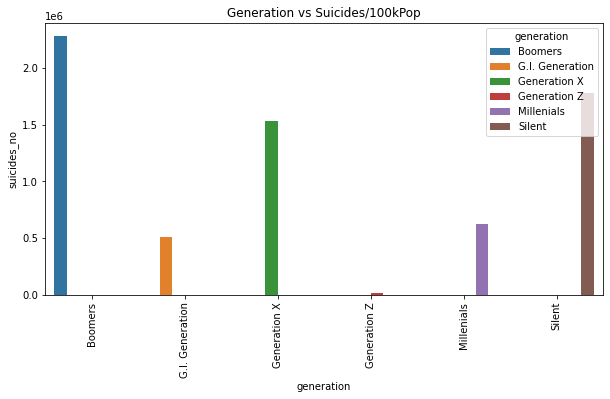

In [133]:
plt.figure(figsize=(10,5))
sea.barplot(x = "generation", y = "suicides_no", hue = "generation",data = data.groupby(["generation"]).sum().reset_index()).set_title("Generation vs Suicides/100kPop")
plt.xticks(rotation = 90) 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 [Text(0, 0, '1985'),
  Text(1, 0, '1986'),
  Text(2, 0, '1987'),
  Text(3, 0, '1988'),
  Text(4, 0, '1989'),
  Text(5, 0, '1990'),
  Text(6, 0, '1991'),
  Text(7, 0, '1992'),
  Text(8, 0, '1993'),
  Text(9, 0, '1994'),
  Text(10, 0, '1995'),
  Text(11, 0, '1996'),
  Text(12, 0, '1997'),
  Text(13, 0, '1998'),
  Text(14, 0, '1999'),
  Text(15, 0, '2000'),
  Text(16, 0, '2001'),
  Text(17, 0, '2002'),
  Text(18, 0, '2003'),
  Text(19, 0, '2004'),
  Text(20, 0, '2005'),
  Text(21, 0, '2006'),
  Text(22, 0, '2007'),
  Text(23, 0, '2008'),
  Text(24, 0, '2009'),
  Text(25, 0, '2010'),
  Text(26, 0, '2011'),
  Text(27, 0, '2012'),
  Text(28, 0, '2013'),
  Text(29, 0, '2014'),
  Text(30, 0, '2015'),
  Text(31, 0, '2016')])

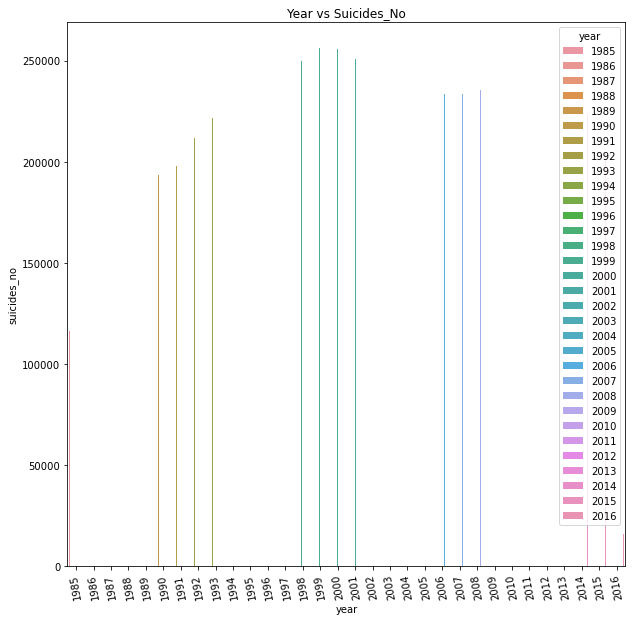

In [134]:
plt.figure(figsize=(10,10))
sea.barplot(x = "year", y = "suicides_no", hue = "year",
data = data.groupby(["year"]).sum().reset_index()).set_title("Year vs Suicides_No") 
plt.xticks(rotation = 100) 

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '15-24 years'),
  Text(1, 0, '25-34 years'),
  Text(2, 0, '35-54 years'),
  Text(3, 0, '5-14 years'),
  Text(4, 0, '55-74 years'),
  Text(5, 0, '75+ years')])

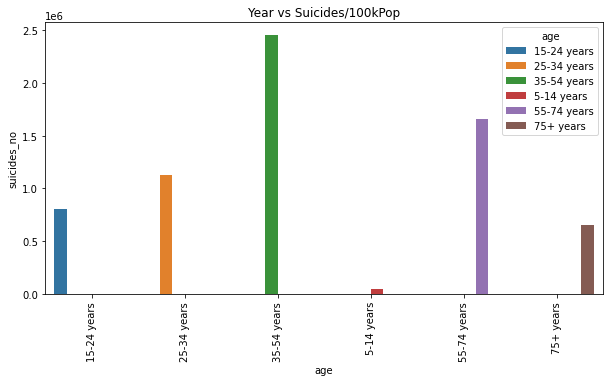

In [138]:
plt.figure(figsize=(10,5))
sea.barplot(x = "age", y = "suicides_no", hue = "age",data = data.groupby(["age"]).sum().reset_index()).set_title("Year vs Suicides/100kPop")
plt.xticks(rotation = 90)


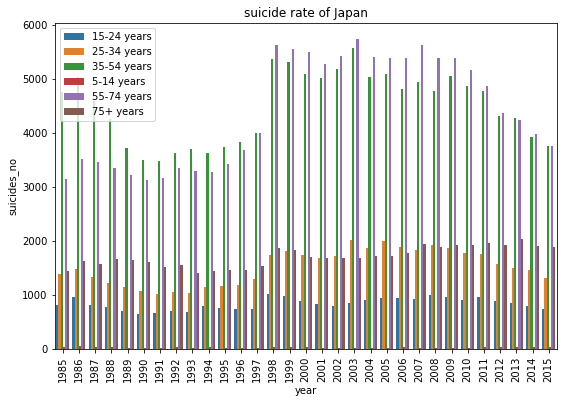

In [139]:
plt.figure(figsize = (9,6))
sea.barplot(x="year", y="suicides_no", hue="age",
            ci = None,data = (data[data["country"] == "Japan"]) )
plt.xticks(rotation = 90)
plt.title("suicide rate of Japan" )
plt.legend()    
plt.show()

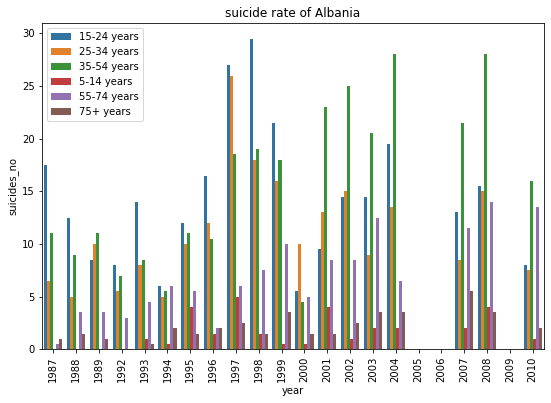

In [140]:
plt.figure(figsize = (9,6))
sea.barplot(x="year", y="suicides_no", hue="age",
            ci = None,data = (data[data["country"] == "Albania"]) )
plt.xticks(rotation = 90)
plt.title("suicide rate of Albania" )
plt.legend()    
plt.show()

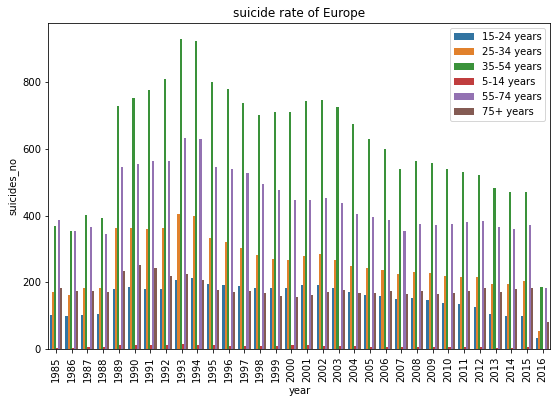

In [141]:
plt.figure(figsize = (9,6))
sea.barplot(x="year", y="suicides_no", hue="age",
            ci = None,data = (data[data["Continent"] == "Europe"]) )
plt.xticks(rotation = 90)
plt.title("suicide rate of Europe" )
plt.legend()    
plt.show()

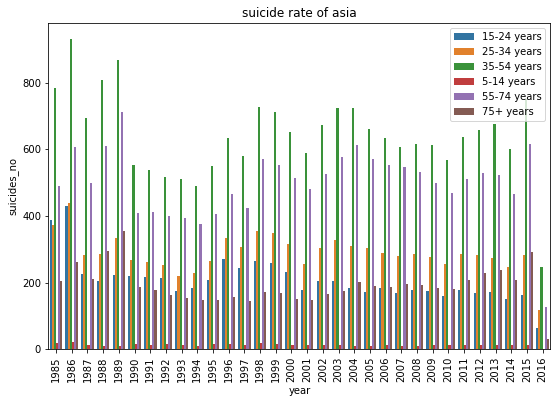

In [142]:
plt.figure(figsize = (9,6))
sea.barplot(x="year", y="suicides_no", hue="age",
            ci = None,data = (data[data["Continent"] == "Asia"]) )
plt.xticks(rotation = 90)
plt.title("suicide rate of asia" )
plt.legend()    
plt.show()

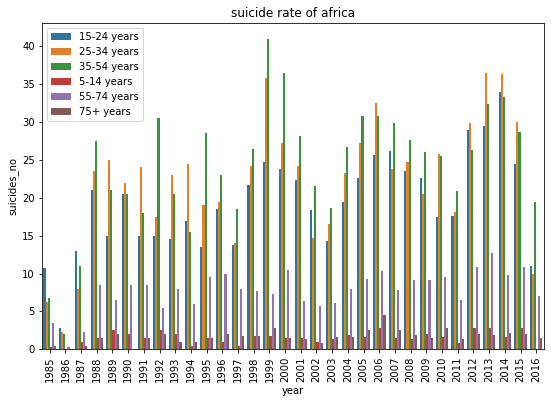

In [143]:
plt.figure(figsize = (9,6))
sea.barplot(x="year", y="suicides_no", hue="age",
            ci = None,data = (data[data["Continent"] == "Africa"]) )
plt.xticks(rotation = 90)
plt.title("suicide rate of africa" )
plt.legend()    
plt.show()

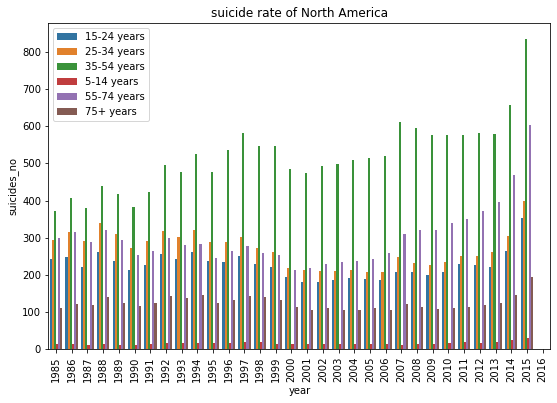

In [144]:
plt.figure(figsize = (9,6))
sea.barplot(x="year", y="suicides_no", hue="age",
            ci = None,data = (data[data["Continent"] == "North_America"]) )
plt.xticks(rotation = 90)
plt.title("suicide rate of North America" )
plt.legend()    
plt.show()

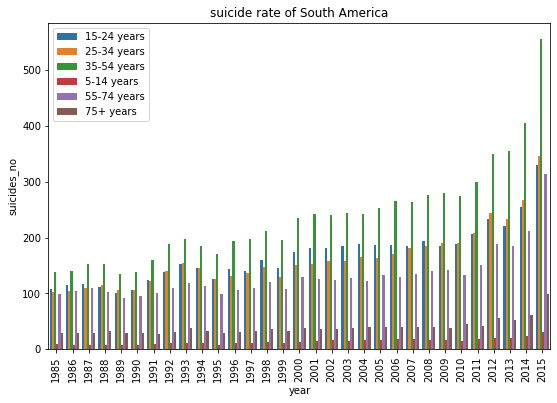

In [145]:
plt.figure(figsize = (9,6))
sea.barplot(x="year", y="suicides_no", hue="age",
            ci = None,data = (data[data["Continent"] == "South_America"]) )
plt.xticks(rotation = 90)
plt.title("suicide rate of South America" )
plt.legend()    
plt.show()

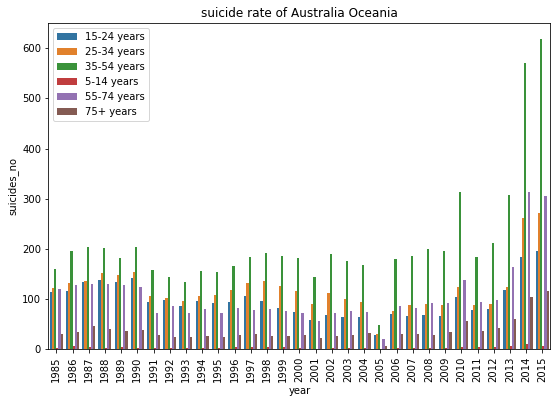

In [146]:
plt.figure(figsize = (9,6))
sea.barplot(x="year", y="suicides_no", hue="age",
            ci = None,data = (data[data["Continent"] == "Australia_Oceania"]) )
plt.xticks(rotation = 90)
plt.title("suicide rate of Australia Oceania" )
plt.legend()    
plt.show()

In [147]:
europe = ['Albania', 'Austria', 'Azerbaijan', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Montenegro', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russian Federation', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom']
asia = ['Armenia', 'Bahrain', 'Israel', 'Japan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Macau', 'Maldives', 'Mongolia', 'Oman', 'Philippines', 'Qatar', 'Republic of Korea', 'Singapore', 'Sri Lanka', 'Thailand', 'Turkey', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan']
northamerica = ['Antigua and Barbuda', 'Bahamas', 'Barbados', 'Belize', 'Canada', 'Costa Rica', 'Cuba', 'Dominica', 'El Salvador', 'Grenada', 'Guatemala', 'Jamaica', 'Mexico', 'Nicaragua', 'Panama', 'Puerto Rico', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and Grenadines', 'United States']
southamerica =  ['Argentina', 'Aruba', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Paraguay', 'Suriname', 'Trinidad and Tobago', 'Uruguay']
africa = ['Cabo Verde', 'Mauritius', 'Seychelles', 'South Africa'] 
australiaoceania = ['Australia', 'Fiji', 'Kiribati', 'New Zealand']
#move these to a dictionary of continents
continents = {country: 'Asia' for country in asia}
continents.update({country: 'Europe' for country in europe})
continents.update({country: 'Africa' for country in africa})
continents.update({country: 'North_America' for country in northamerica})
continents.update({country: 'South_America' for country in southamerica})
continents.update({country: 'Australia_Oceania' for country in australiaoceania})

In [150]:
datacont.corr(method = 'pearson')

#Bu veri çerçevesinde Pearson yöntemi kullanılarak GdpPerCapita($) ile Suicides/100kPop arasında -0.175131'lik bir korelasyon olduğu, yani ikisi arasında güçlü olmayan bir ilişki olduğu anlamına gelirken, korelasyonun negatif olduğunu gösteren negatif bir korelasyon olduğu gözlemlenebilir. ilişki ters orantılıdır yani biri arttıkça diğeri azalır. Bu aynı zamanda Seaborn kullanılarak bir ısı haritası olarak görselleştirilebilir ve korelasyon matrisinin daha hoş bir görünümünü verir.

,index,suicides_no,gdp_per_capita ($)
index,1.000000,0.046490,-0.041733
suicides_no,0.046490,1.000000,0.200013
gdp_per_capita ($),-0.041733,0.200013,1.000000


In [151]:
data['sex'].value_counts()

#eşi sayıda verimiz var-kadın erkek açısından

male      13910
female    13910
Name: sex, dtype: int64

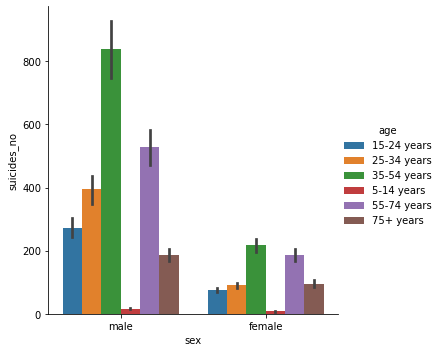

In [152]:
sea.catplot(x="sex", y="suicides_no", hue="age", kind="bar", data=data);

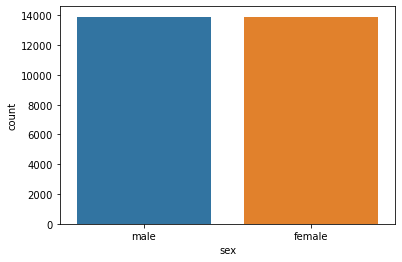

In [153]:
sea.countplot(x='sex', data=data);

In [155]:
newData= data.loc[:,['year','sex','age','suicides_no']]
newData.head(3)

#çoklu regresyon yapmaya alışıyoruz
#Belirli bir yaş grubu ve cinsiyete ilişkin belirli bir yıl verilen Y'yi (intihar sayısı) tahmin etmek istiyoruz.

,year,sex,age,suicides_no
0,1987,male,15-24 years,21
1,1987,female,15-24 years,14
2,1988,male,15-24 years,17


In [156]:
age = data['age'].unique()
for a in age:
    print('Suicide Rate : {} old category'.format(a))
    print(data[data['age'] == a].groupby(['country']).sum()['suicides/100k pop'].sort_values(ascending = False)[:3])
    print()
    
    #Toplam intihar oranlarının en yüksek olduğu ülke hangisidir?

Suicide Rate : 15-24 years old category
country
Russian Federation    133469
Kazakhstan            119339
Guyana                116560
Name: suicides/100k pop, dtype: int64

Suicide Rate : 25-34 years old category
country
Russian Federation    190158
Kazakhstan            165635
Lithuania             162275
Name: suicides/100k pop, dtype: int64

Suicide Rate : 35-54 years old category
country
Lithuania             250811
Russian Federation    205384
Hungary               198198
Name: suicides/100k pop, dtype: int64

Suicide Rate : 5-14 years old category
country
Kazakhstan            10995
Suriname              10422
Russian Federation     9358
Name: suicides/100k pop, dtype: int64

Suicide Rate : 55-74 years old category
country
Lithuania             222703
Hungary               214155
Russian Federation    201164
Name: suicides/100k pop, dtype: int64

Suicide Rate : 75+ years old category
country
Hungary              399484
Republic of Korea    385920
Austria              352191
Name

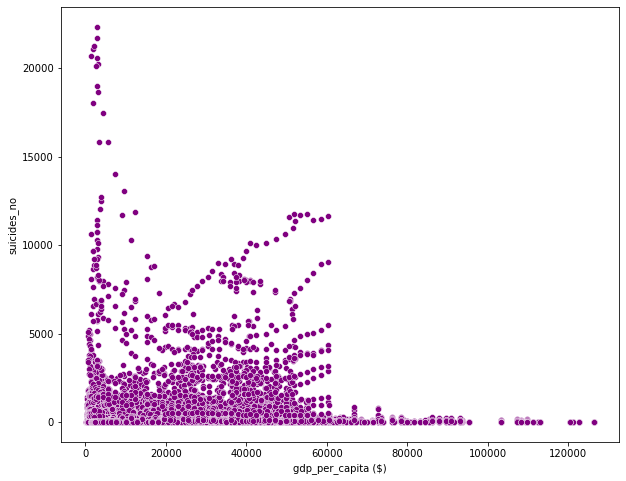

In [159]:
f, ax = plt.subplots(1,1, figsize=(10,8))
ax = sea.scatterplot(x="gdp_per_capita ($)", y="suicides_no", data=data, color='purple')

#Yıl için gsyh ile intihar sayısı arasındaki ilişkinin kontrol edilmesi
#"gdp_for_year" ve "suicides_no" arasındaki ilişki doğrusal değildir. Dolayısıyla GSYİH intihar oranı üzerinde gerçek bir etkisi olan bir şey değildir.

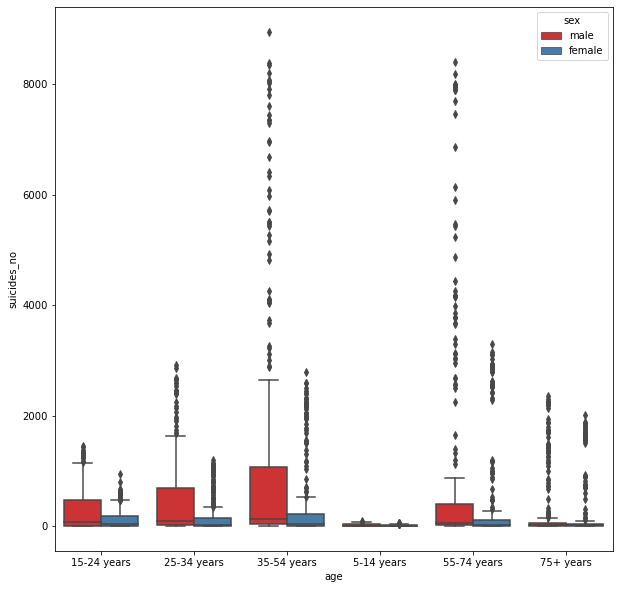

In [160]:
f, ax = plt.subplots(1,1, figsize=(10,10))
ax = sea.boxplot(x='age', y='suicides_no', hue='sex',
                 data=data[data['Continent']=='Asia'],
                 palette='Set1')

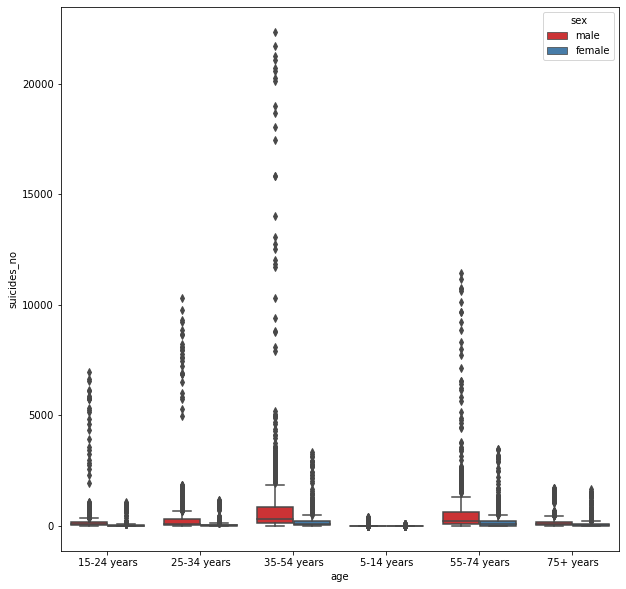

In [161]:
f, ax = plt.subplots(1,1, figsize=(10,10))
ax = sea.boxplot(x='age', y='suicides_no', hue='sex',
                 data=data[data['Continent']=='Europe'],
                 palette='Set1')

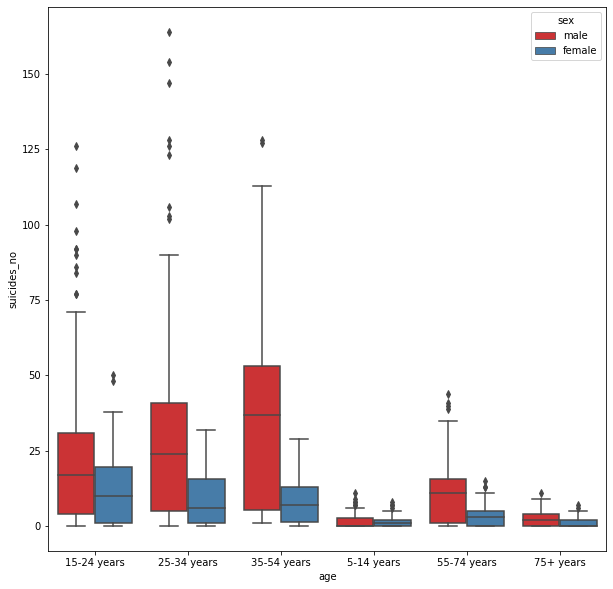

In [162]:
f, ax = plt.subplots(1,1, figsize=(10,10))
ax = sea.boxplot(x='age', y='suicides_no', hue='sex',
                 data=data[data['Continent']=='Africa'],
                 palette='Set1')

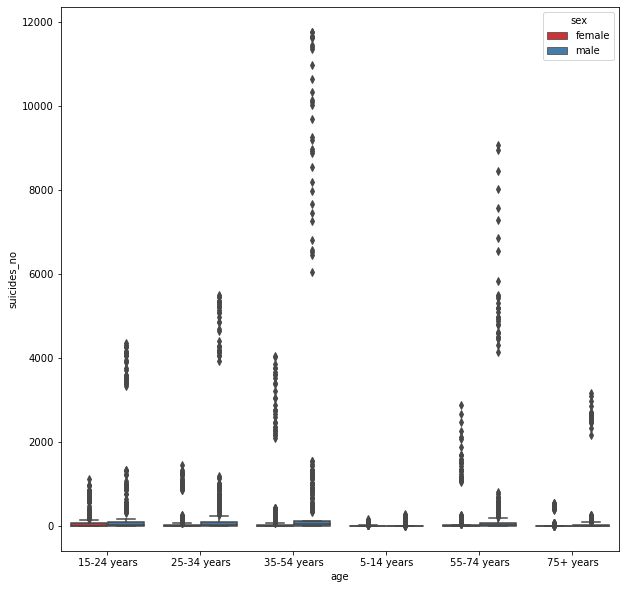

In [163]:
f, ax = plt.subplots(1,1, figsize=(10,10))
ax = sea.boxplot(x='age', y='suicides_no', hue='sex',
                 data=data[data['Continent']=='North_America'],
                 palette='Set1')

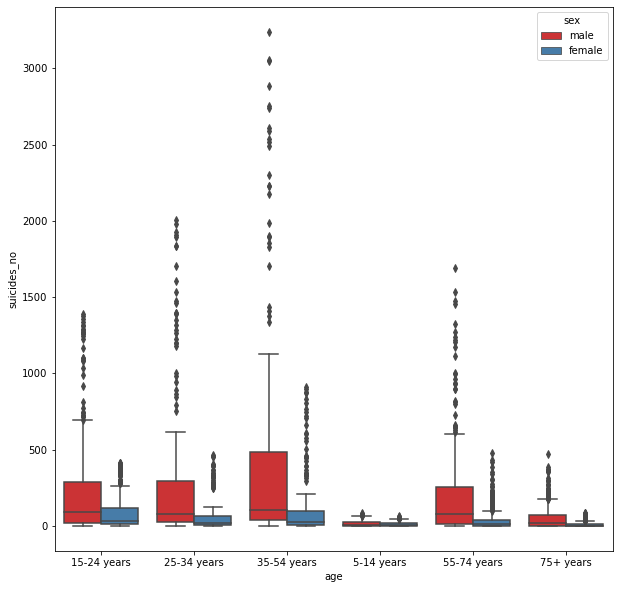

In [164]:
f, ax = plt.subplots(1,1, figsize=(10,10))
ax = sea.boxplot(x='age', y='suicides_no', hue='sex',
                 data=data[data['Continent']=='South_America'],
                 palette='Set1')

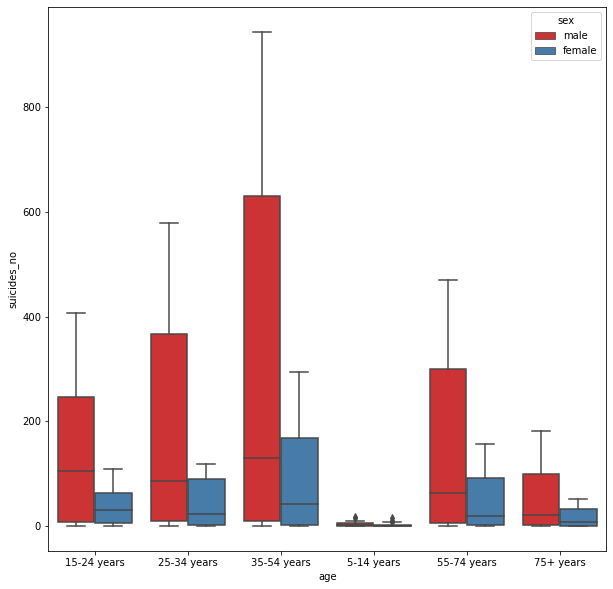

In [165]:
f, ax = plt.subplots(1,1, figsize=(10,10))
ax = sea.boxplot(x='age', y='suicides_no', hue='sex',
                 data=data[data['Continent']=='Australia_Oceania'],
                 palette='Set1')

In [166]:
year_2015 = data[(data['year'] == 2015)]
year_2015 = year_2015.groupby('country')[['suicides_no']].sum().reset_index()

year_2015 = year_2015.sort_values(by='suicides_no', ascending=False)
year_2015.style.background_gradient(cmap='Oranges', subset=['suicides_no'])

,country,suicides_no
60,United States,44189
45,Russian Federation,25432
27,Japan,23092
43,Republic of Korea,13510
7,Brazil,11163
19,Germany,10088
58,Ukraine,7574
35,Mexico,6234
40,Poland,5420
59,United Kingdom,4910


In [167]:
year_2006 = data[(data['year'] == 2006)]
year_2006 = year_2006.groupby('country')[['suicides_no']].sum().reset_index()

year_2006 = year_2006.sort_values(by='suicides_no', ascending=False)
year_2006.style.background_gradient(cmap='Oranges', subset=['suicides_no'])

,country,suicides_no
63,Russian Federation,42614
83,United States,33292
41,Japan,29769
61,Republic of Korea,10653
28,France,10423
80,Ukraine,10013
30,Germany,9775
12,Brazil,8618
58,Poland,5805
50,Mexico,4230


In [168]:
year_2000 = data[(data['year'] == 2000)]
year_2000 = year_2000.groupby('country')[['suicides_no']].sum().reset_index()

year_2000 = year_2000.sort_values(by='suicides_no', ascending=False)
year_2000.style.background_gradient(cmap='Oranges', subset=['suicides_no'])

,country,suicides_no
64,Russian Federation,56619
40,Japan,29989
83,United States,29343
81,Ukraine,14467
31,Germany,11073
29,France,10849
14,Brazil,6763
62,Republic of Korea,6444
59,Poland,5841
74,Sri Lanka,5252


In [169]:
year_1995 = data[(data['year'] == 1995)]
year_1995 = year_1995.groupby('country')[['suicides_no']].sum().reset_index()

year_1995 = year_1995.sort_values(by='suicides_no', ascending=False)
year_1995.style.background_gradient(cmap='Oranges', subset=['suicides_no'])

,country,suicides_no
60,Russian Federation,60548
75,United States,31272
39,Japan,21249
73,Ukraine,14541
29,Germany,12888
27,France,11819
13,Brazil,6536
54,Poland,5499
58,Republic of Korea,4841
40,Kazakhstan,4706


In [170]:
year_1990 = data[(data['year'] == 1990)]
year_1990 = year_1990.groupby('country')[['suicides_no']].sum().reset_index()

year_1990 = year_1990.sort_values(by='suicides_no', ascending=False)
year_1990.style.background_gradient(cmap='Oranges', subset=['suicides_no'])

,country,suicides_no
48,Russian Federation,39028
61,United States,30895
32,Japan,20002
22,Germany,13924
20,France,11403
59,Ukraine,10645
43,Poland,4970
10,Brazil,4803
60,United Kingdom,4643
30,Italy,4402


In [171]:
year_1985 = data[(data['year'] == 1985)]
year_1985 = year_1985.groupby('country')[['suicides_no']].sum().reset_index()

year_1985 = year_1985.sort_values(by='suicides_no', ascending=False)
year_1985.style.background_gradient(cmap='Oranges', subset=['suicides_no'])

,country,suicides_no
46,United States,29446
24,Japan,23257
16,France,12501
41,Sri Lanka,5668
45,United Kingdom,5105
22,Italy,4759
8,Brazil,4228
36,Republic of Korea,3689
10,Canada,3258
43,Thailand,2982


In [173]:
agegrp = data[['age','suicides_no','suicides/100k pop']].copy()
agegrp['age'] = agegrp['age'].apply(lambda x: '5-34' if x == '15-24 years' or x == '5-14 years' or x == '25-34 years' else '35+')
agegrp = agegrp.sort_values(by='suicides_no', ascending=True)

#İlk önce genç ve yaşlıların intihar oranları arasındaki ilişkiyi araştırdık. Yaşları iki gruba ayırdık ve 5-34 yaş arasındaki kişileri birinci gruba, 34 yaş üstü kişileri ikinci gruba yerleştirdik.

In [174]:
agegrp.groupby('age').mean()

,suicides_no,suicides/100k pop
age,,
35+,342.072526,1665.563837
5-34,142.847128,661.944149


In [184]:
country = data[['Continent', 'gdp_per_capita ($)' , 'suicides_no']].copy()

sum_country = country.groupby('Continent').mean()
sum_country.sort_values(by = 'suicides_no', ascending = False).head()

#Bu bölümde intihar oranları ile farklı ülkeler arasındaki ilişkiyi analiz edeceğiz. Bununla birlikte, intihar oranları ile ülke GSYİH arasındaki korelasyonu da hesaba katıyoruz.
#Bu bilgilere dayanarak, GSYİH'si daha yüksek olan ülkelerde intihar oranının daha yüksek olduğunu bulduk.

,gdp_per_capita ($),suicides_no
Continent,,
Asia,16405.498732,306.605241
Europe,23180.951875,283.250830
North_America,11393.186489,240.118397
South_America,6255.983553,123.662281
Australia_Oceania,20766.395062,87.295267


In [192]:
mean_gdp = country['gdp_per_capita ($)'].mean()
country['gdp_per_capita ($)'] = country['gdp_per_capita ($)'].apply(lambda x: 'above average' if x > mean_gdp else 'below average')

In [193]:
country.groupby('Continent')['suicides_no'].mean()

Continent
Africa                13.358824
Asia                 306.605241
Australia_Oceania     87.295267
Europe               283.250830
North_America        240.118397
South_America        123.662281
Name: suicides_no, dtype: float64

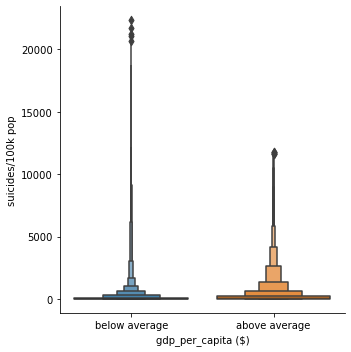

In [229]:
# sns.catplot(x="gdp_per_capita ($)", y="suicides/100k pop", kind = 'boxen', data=country);
ax = sea.catplot(x="gdp_per_capita ($)", y="suicides_no", kind = 'boxen', data=country)
ax.set_xlabels("gdp_per_capita ($)")
ax.set_ylabels("suicides/100k pop");

#Aşağıdaki tabloda, daha yüksek GSYİH'nın daha yüksek intihar oranlarına yol açtığını görebiliriz.

In [ ]:
data.rename(index = str, columns = {'suicides/100k pop':'suiciderate'}, inplace=True)
data.rename(index = str, columns = {'gdp_per_capita ($)':'gdp'}, inplace=True)
data.rename(index = str, columns = {' gdp_for_year ($) ':'yearlygdp'}, inplace=True)

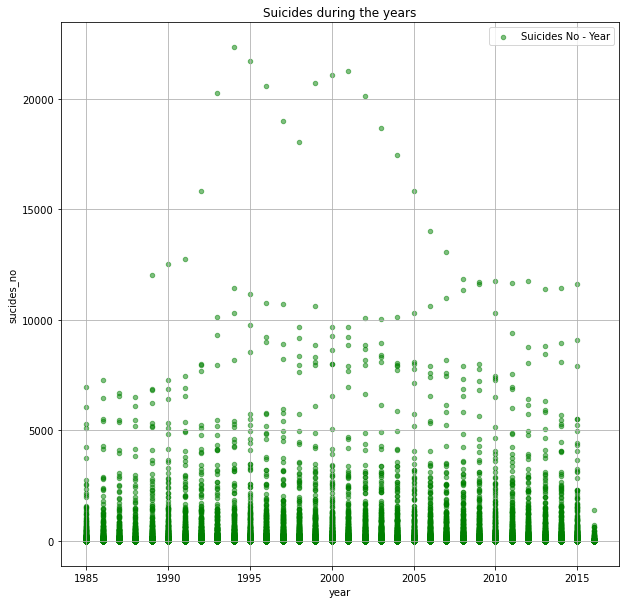

In [18]:
data.plot(kind='scatter',x='year',y='suicides_no',alpha=0.5,color='green',
        figsize=(10,10),
        grid=True,label='Suicides No - Year')
plt.xlabel('year')
plt.ylabel('sucides_no')
plt.legend()
plt.title('Suicides during the years')
plt.show()
##Ülkeye göre intihar sayısı.

In [22]:
#nüfus başına intiharr oranı

data['suicide_per_pop'] = data['suicides_no']/data['population']

data.tail(10)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,Continent,suicide_per_pop
27810,Uzbekistan,2010,male,75+ years,9,196160,459,Uzbekistan2010,655.0,"39,332,770,929",1533,Silent,Asia,0.000046
27811,Uzbekistan,2010,female,75+ years,5,322899,155,Uzbekistan2010,655.0,"39,332,770,929",1533,Silent,Asia,0.000015
27812,Uzbekistan,2011,male,75+ years,10,204956,488,Uzbekistan2011,661.0,"45,915,191,189",1767,Silent,Asia,0.000049
27813,Uzbekistan,2011,female,75+ years,5,330662,151,Uzbekistan2011,661.0,"45,915,191,189",1767,Silent,Asia,0.000015
27814,Uzbekistan,2012,male,75+ years,15,213713,702,Uzbekistan2012,668.0,"51,821,573,338",1964,Silent,Asia,0.000070
27815,Uzbekistan,2012,female,75+ years,4,338557,118,Uzbekistan2012,668.0,"51,821,573,338",1964,Silent,Asia,0.000012
27816,Uzbekistan,2013,male,75+ years,13,221002,588,Uzbekistan2013,672.0,"57,690,453,461",2150,Silent,Asia,0.000059
27817,Uzbekistan,2013,female,75+ years,8,345180,232,Uzbekistan2013,672.0,"57,690,453,461",2150,Silent,Asia,0.000023
27818,Uzbekistan,2014,male,75+ years,17,224995,756,Uzbekistan2014,675.0,"63,067,077,179",2309,Silent,Asia,0.000076
27819,Uzbekistan,2014,female,75+ years,9,348465,258,Uzbekistan2014,675.0,"63,067,077,179",2309,Silent,Asia,0.000026


C:\Users\asuss\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\asuss\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


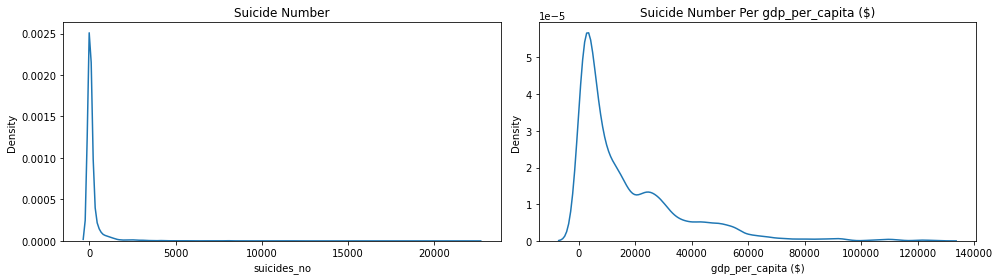

In [24]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.title('Suicide Number')
sea.distplot(data['suicides_no'], hist=False)
plt.subplot(122)
plt.title('Suicide Number Per gdp_per_capita ($)')
sea.distplot(data['gdp_per_capita ($)'], hist=False)
plt.tight_layout()

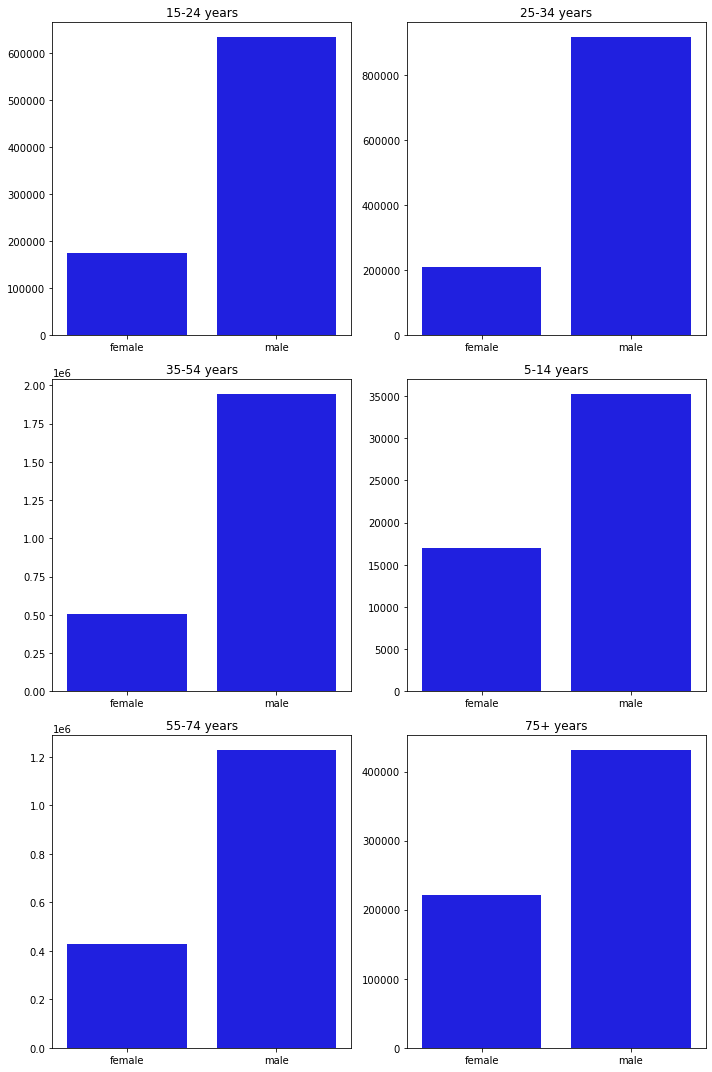

In [26]:
female_=[175437,208823,506233,16997,430036,221984]
male_=[633105,915089,1945908,35267,1228407,431134]
plot_id = 0
for i,age in enumerate(['15-24 years','25-34 years','35-54 years','5-14 years','55-74 years','75+ years']):
    plot_id += 1
    plt.subplot(3,2,plot_id)
    plt.title(age)
    fig, ax = plt.gcf(), plt.gca()
    sea.barplot(x=['female','male'],y=[female_[i],male_[i]],color='blue')
    plt.tight_layout()
    fig.set_size_inches(10, 15)
plt.show() 

In [30]:
min_suicides_no=min(data.suicides_no)
max_suicides_no=max(data.suicides_no)
print('Min suicides_no :',min_suicides_no)
print('Max suicides_no :',max_suicides_no)



Min suicides_no : 0
Max suicides_no : 22338


Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation', 'Continent',
       'suicide_per_pop'],
      dtype='object')

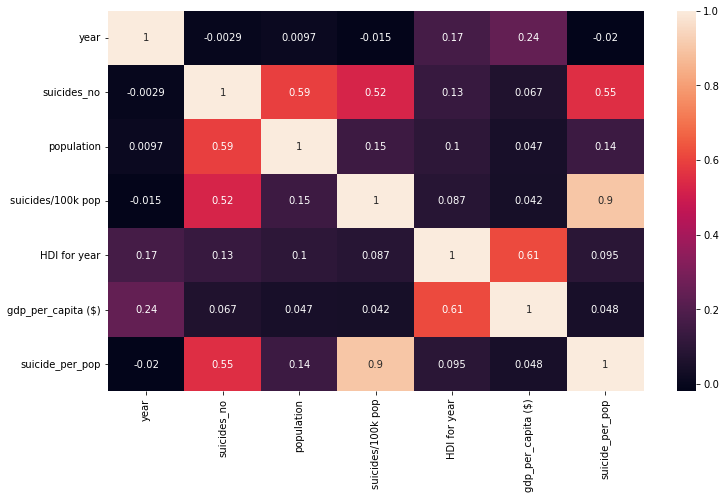

In [33]:
corr = data.corr(method='kendall')
plt.figure(figsize=(12,7))
sea.heatmap(corr, annot=True)
data.columns

C:\Users\asuss\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


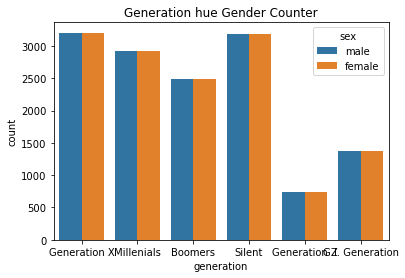

In [34]:
sea.countplot(data.generation,hue=data.sex)
plt.title('Generation hue Gender Counter')
plt.show()

ConversionError: Failed to convert value(s) to axis units: '1985'

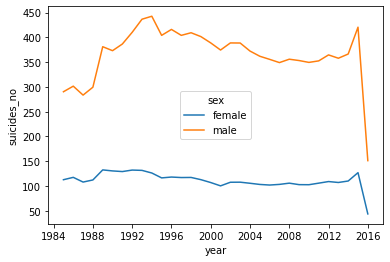

In [46]:
data["year"] = pd.to_datetime(data["year"], format = "%Y")
data = data.groupby(["year", "sex"]).agg("mean").reset_index()
sea.lineplot(x = "year", y = "suicides_no", hue = "sex", data = data)
plt.xlim("1985", "2015")
plt.title("Evolution of the mean suicides no (1985 - 2015)");


In [47]:
#yılara göre intihar sayıları -yüksekten düşüğe
year_suicides = data.groupby('year')[['suicides_no']].sum().reset_index()
year_suicides.sort_values(by='suicides_no', ascending=False).style.background_gradient(cmap='Greens', subset=['suicides_no'])

,year,suicides_no
9,1994-01-01 00:00:00,568.781863
8,1993-01-01 00:00:00,568.115385
30,2015-01-01 00:00:00,547.419355
7,1992-01-01 00:00:00,542.238462
11,1996-01-01 00:00:00,534.036797
13,1998-01-01 00:00:00,526.563291
12,1997-01-01 00:00:00,521.093074
10,1995-01-01 00:00:00,520.393162
6,1991-01-01 00:00:00,515.677083
14,1999-01-01 00:00:00,514.295181


In [48]:
#nüfus başına intiharr oranı

data['suicide_per_pop'] = data['suicides_no']/data['population']

data.tail(10)

,year,sex,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($),suicide_per_pop
54,2012-01-01,female,109.076132,2.013156e+06,398.718107,736.102564,26808.950617,0.000054
55,2012-01-01,male,364.504115,1.922671e+06,1646.292181,736.102564,26808.950617,0.000190
56,2013-01-01,female,107.206250,2.012146e+06,383.633333,710.948052,28032.675000,0.000053
57,2013-01-01,male,357.791667,1.925691e+06,1648.245833,710.948052,28032.675000,0.000186
58,2014-01-01,female,110.162393,2.088844e+06,415.784188,699.680000,27420.141026,0.000053
59,2014-01-01,male,366.299145,1.996748e+06,1627.008547,699.680000,27420.141026,0.000183
60,2015-01-01,female,127.010753,2.440263e+06,409.362903,NaN,26231.193548,0.000052
61,2015-01-01,male,420.408602,2.330323e+06,1649.919355,NaN,26231.193548,0.000180
62,2016-01-01,female,43.800000,8.421062e+05,437.200000,NaN,25665.125000,0.000052
63,2016-01-01,male,151.237500,8.091675e+05,2068.387500,NaN,25665.125000,0.000187
